In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy.signal import lombscargle, find_peaks
star_radius = 82927.44 #km

# Importing the dataset
hdu = fits.open('tess2023263165758-s0070-0000000278892590-0265-a_fast-lc.fits')
hdu.info()
df = pd.DataFrame(hdu[1].data)
df

Filename: tess2023263165758-s0070-0000000278892590-0265-a_fast-lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   110040R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,3208.353417,0.005638,8557461,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3208.353648,0.005638,8557462,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3208.353880,0.005638,8557463,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3208.354111,0.005638,8557464,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3208.354343,0.005638,8557465,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110035,3233.823408,0.004576,8667496,250.890518,24.977499,8606.903320,11.041548,NaN,NaN,4096,NaN,NaN,NaN,NaN,1943.977682,0.057272,1433.815302,0.060095,-0.003341,-0.079253
110036,3233.823639,0.004576,8667497,277.500763,25.011923,8622.070312,11.055859,NaN,NaN,4096,NaN,NaN,NaN,NaN,1944.018260,0.051823,1433.774915,0.055308,-0.028072,-0.062702
110037,3233.823871,0.004576,8667498,319.631805,25.030462,8604.701172,11.037881,NaN,NaN,4096,NaN,NaN,NaN,NaN,1943.944797,0.045267,1433.753720,0.048598,-0.020209,-0.063526
110038,3233.824102,0.004576,8667499,267.516998,25.010437,8623.177734,11.062732,NaN,NaN,4096,NaN,NaN,NaN,NaN,1943.931599,0.053897,1433.886939,0.055076,-0.031274,-0.062298


In [46]:
df.dropna(subset=['SAP_FLUX'], inplace=True)
df.SAP_FLUX = df.SAP_FLUX/np.mean(df.SAP_FLUX)
df = df[df['SAP_FLUX'] <= 1.5]
df = df.reset_index(drop=True)


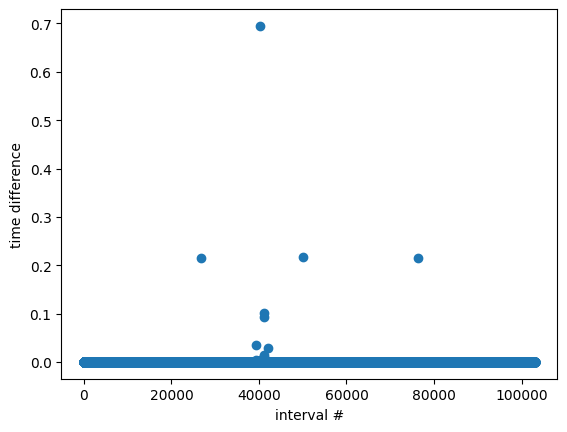

In [47]:
time_differences = []
for i in range(len(df.TIME)-1):
    time_difference = df.TIME[i+1]-df.TIME[i] # Took the difference from one time to the next
    time_differences.append(time_difference)
plt.scatter(range(len(time_differences)), time_differences)
plt.xlabel("interval #")
plt.ylabel("time difference")
plt.show()

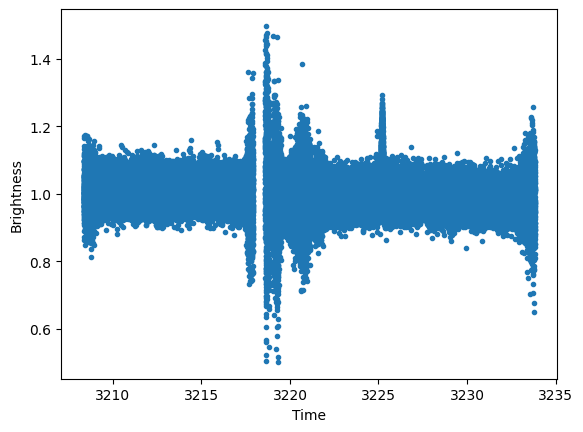

In [48]:
df.SAP_FLUX = df.SAP_FLUX/np.mean(df.SAP_FLUX)
plt.plot(df.TIME, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

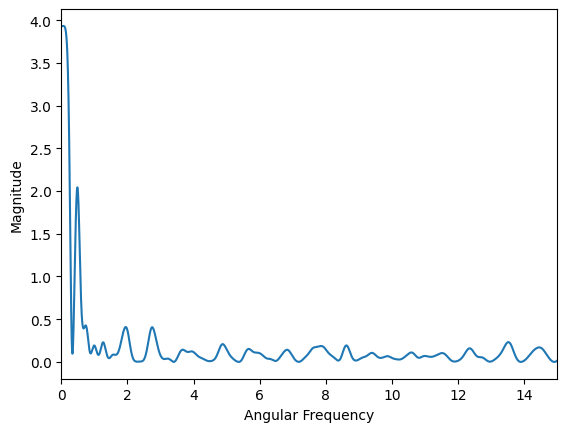

In [49]:
periodmax = 10000
periodmin = .4
afreqs = 2 * np.pi * np.linspace(1 / periodmax, 1/periodmin, 3235)
power = lombscargle(df.TIME, df.SAP_FLUX, afreqs, precenter=True)
plt.plot(afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 15)
plt.show()

In [50]:
dom_freq_index, ignore = find_peaks(power, height = 3.5)
dom_freq = afreqs[dom_freq_index]
dom_freq

array([0.0637685])

In [51]:
dom_period = 2* np.pi /  dom_freq
dom_period

array([98.53117259])

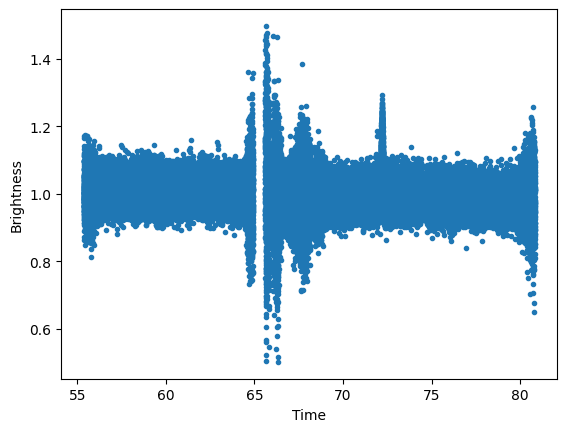

In [52]:
phase = df.TIME % dom_period
plt.plot(phase, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [53]:
dom_freq_index = np.where(power == max(power[int((len(power)/16)*0.4):int((len(power)/16)*0.6)]))
dom_freq = afreqs[dom_freq_index]
dom_freq

array([0.48632204])

In [54]:
dom_period = 2* np.pi /  dom_freq
dom_period

array([12.91980373])

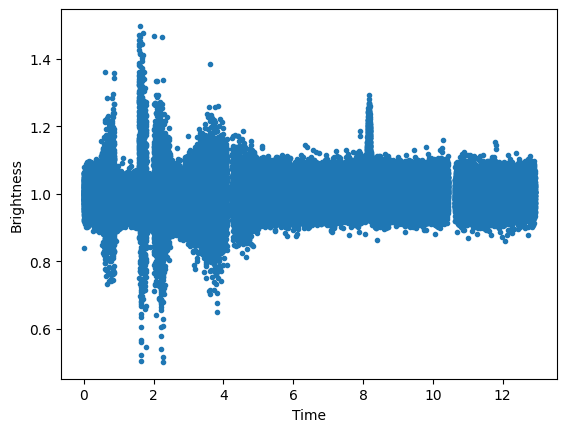

In [55]:
phase = df.TIME % dom_period
plt.plot(phase, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [56]:
sorted_idxs = np.argsort(phase)
sorted_times = phase[sorted_idxs]
sorted_signal = df.SAP_FLUX[sorted_idxs]

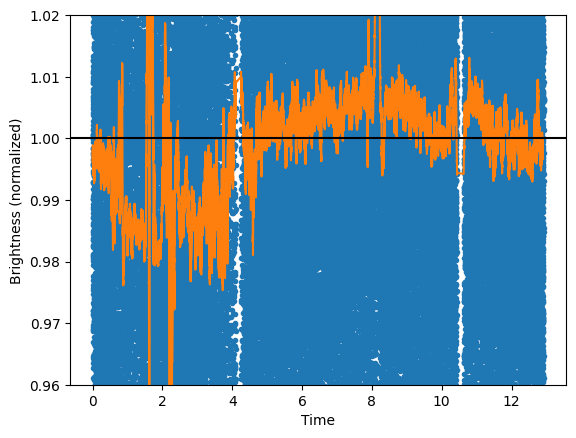

In [57]:
size = 200
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.96, 1.02)
plt.axhline(1, color='black')
plt.show()

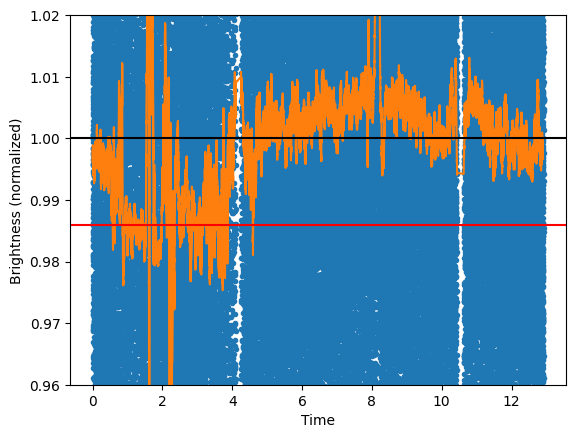

In [58]:

size = 200
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.96, 1.02)
plt.axhline(1, color='black')
plt.axhline(.986, color='red')
plt.show()

In [59]:
lightlost = 1 - .986
planet_radius = star_radius*lightlost**(1/2)
planet_radius

9812.107024964134

In [60]:
dom_freq_index = np.where(power == max(power[int((len(power)/16)*0.74):int((len(power)/16)*0.78)]))
dom_freq = afreqs[dom_freq_index]
dom_freq

array([0.73888278])

In [61]:
dom_period = 2* np.pi /  dom_freq
dom_period

array([8.50362942])

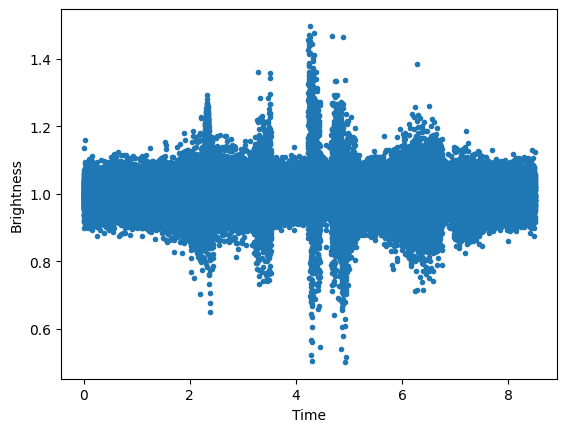

In [62]:
phase = df.TIME % dom_period
plt.plot(phase, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [63]:
sorted_idxs = np.argsort(phase)
sorted_times = phase[sorted_idxs]
sorted_signal = df.SAP_FLUX[sorted_idxs]

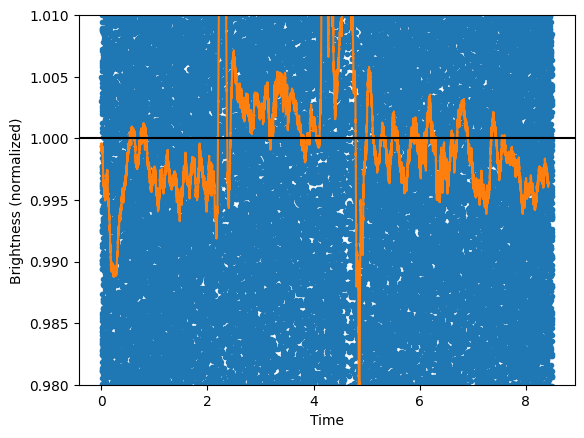

In [64]:
size = 1000
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.98, 1.01)
plt.axhline(1, color='black')
plt.show()

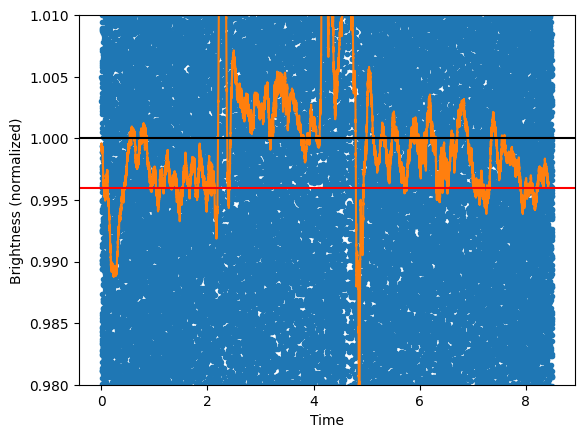

In [65]:
size = 1000
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.98, 1.01)
plt.axhline(1, color='black')
plt.axhline(.996, color='red')
plt.show()

In [66]:
lightlost = 1 - .996
planet_radius = star_radius*lightlost**(1/2)
planet_radius

5244.791818539075

In [67]:
dom_freq_index = np.where(power == max(power[int((len(power)/16)*1.8):int((len(power)/16)*2.2)]))
dom_freq = afreqs[dom_freq_index]
dom_freq

array([1.94826014])

In [68]:
dom_period = 2* np.pi /  dom_freq
dom_period

array([3.22502379])

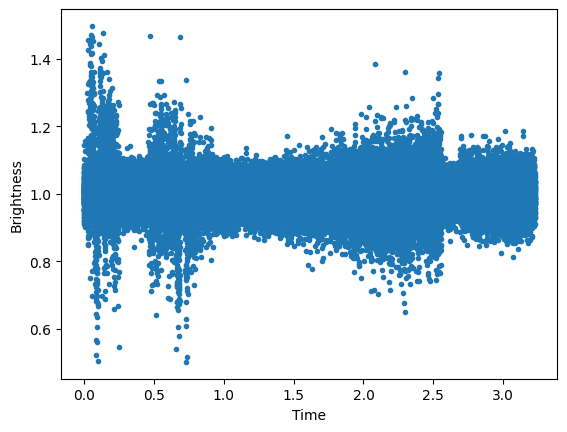

In [69]:
phase = df.TIME % dom_period
plt.plot(phase, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [70]:
sorted_idxs = np.argsort(phase)
sorted_times = phase[sorted_idxs]
sorted_signal = df.SAP_FLUX[sorted_idxs]

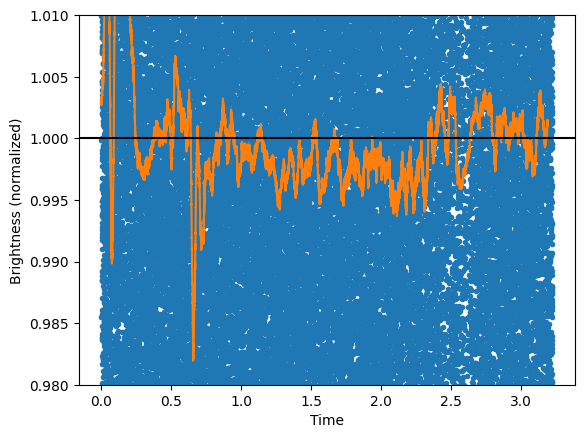

In [71]:
size = 1000
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.98, 1.01)
plt.axhline(1, color='black')
plt.show()

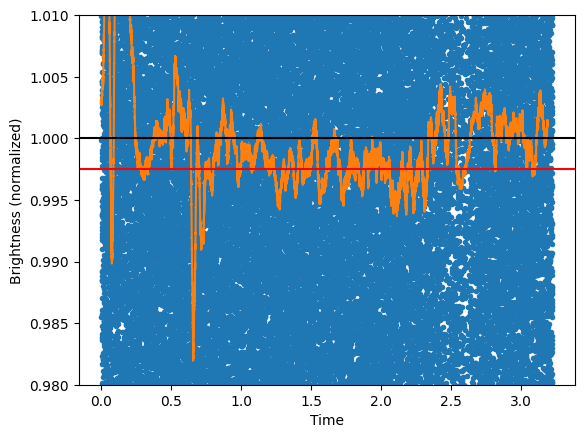

In [72]:
size = 1000
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.98, 1.01)
plt.axhline(1, color='black')
plt.axhline(.9975, color='red')
plt.show()

In [73]:
lightlost = 1 - .9975
planet_radius = star_radius*lightlost**(1/2)
planet_radius

4146.371999999956

In [74]:
dom_freq_index = np.where(power == max(power[int((len(power)/16)*4.5):int((len(power)/16)*5.5)]))
dom_freq = afreqs[dom_freq_index]
dom_freq

array([4.88185022])

In [75]:
dom_period = 2* np.pi /  dom_freq
dom_period

array([1.28705])

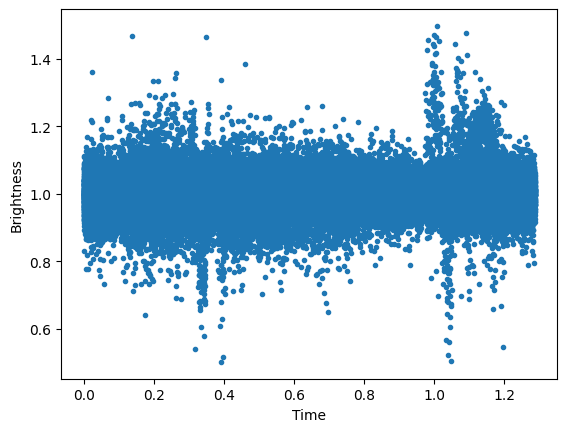

In [76]:
phase = df.TIME % dom_period
plt.plot(phase, df.SAP_FLUX, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [77]:
sorted_idxs = np.argsort(phase)
sorted_times = phase[sorted_idxs]
sorted_signal = df.SAP_FLUX[sorted_idxs]

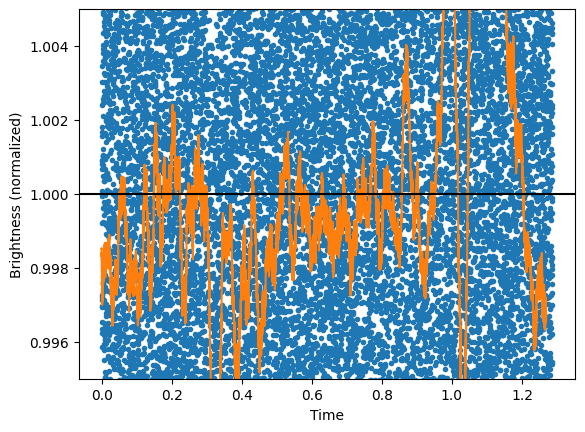

In [78]:
size = 1500
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.995, 1.005)
plt.axhline(1, color='black')
plt.show()

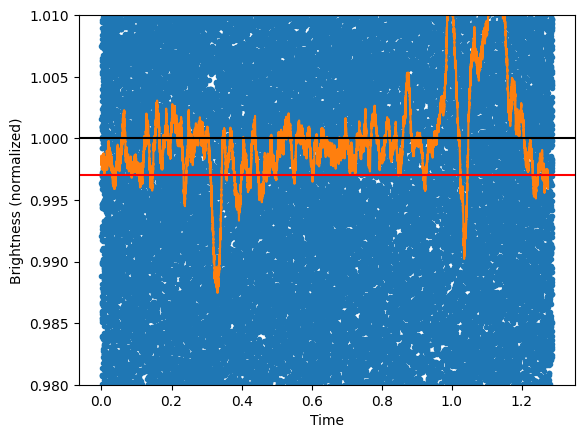

In [79]:
size = 1000
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, df.SAP_FLUX, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.98, 1.01)
plt.axhline(1, color='black')
plt.axhline(.997, color='red')
plt.show()

In [80]:
lightlost = 1 - .997
planet_radius = star_radius*lightlost**(1/2)
planet_radius

4542.122952415623

In [133]:
check = pd.read_csv("check.csv")
check

,Unnamed: 0,time,pdcsap_flux
0,0,1955.798658,0.997168
1,1,1955.800047,1.000942
2,2,1955.801436,1.000325
3,3,1955.802825,0.999300
4,4,1955.804214,0.998986
...,...,...,...
14642,14642,1982.277990,1.000944
14643,14643,1982.279379,0.999762
14644,14644,1982.280768,1.000572
14645,14645,1982.282156,0.999236


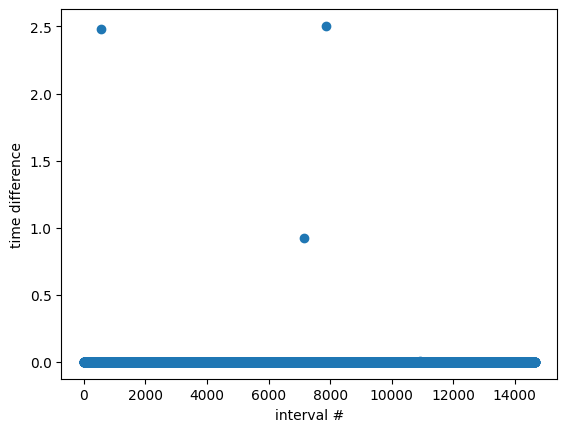

In [134]:
time_differences = []
for i in range(len(check.time)-1):
    time_difference = check.time[i+1]-check.time[i] # Took the difference from one time to the next
    time_differences.append(time_difference)
plt.scatter(range(len(time_differences)), time_differences)
plt.xlabel("interval #")
plt.ylabel("time difference")
plt.show()

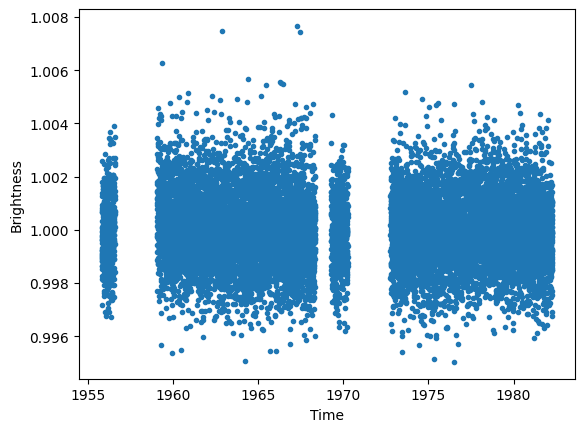

In [135]:
check.pdcsap_flux = check.pdcsap_flux/np.mean(check.pdcsap_flux)
plt.plot(check.time, check.pdcsap_flux, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

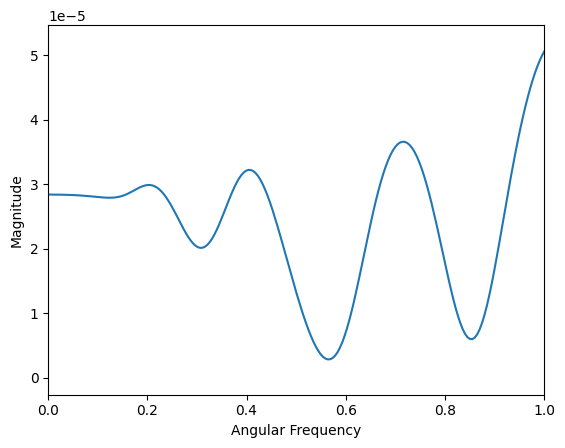

In [136]:
periodmax = 10000
periodmin = .4
afreqs = 2 * np.pi * np.linspace(1 / periodmax, 1/periodmin, 3235)
power = lombscargle(check.time, check.pdcsap_flux, afreqs, precenter=True)
plt.plot(afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 1)
plt.show()

In [137]:
dom_freq = 0.4
dom_freq

0.4

In [138]:
dom_period = 2* np.pi /  dom_freq
dom_period

15.707963267948966

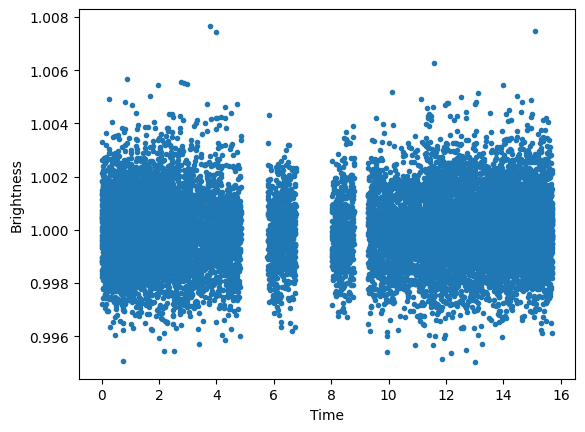

In [139]:
phase = check.time % dom_period
plt.plot(phase, check.pdcsap_flux, ".")
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

In [140]:
sorted_idxs = np.argsort(phase)
sorted_times = phase[sorted_idxs]
sorted_signal = check.pdcsap_flux[sorted_idxs]

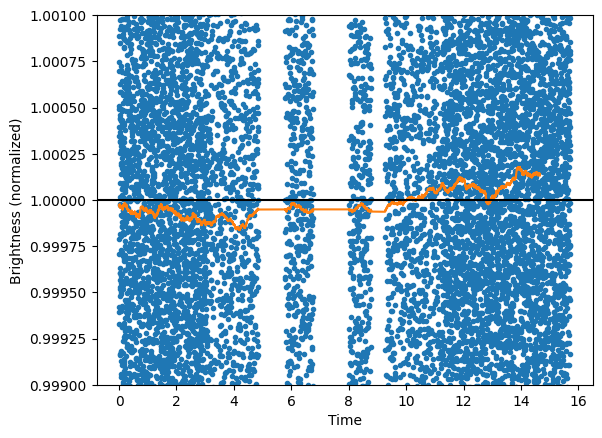

In [144]:
size = 1500
window = np.ones(size) / size 
output = np.convolve(sorted_signal, window, mode = "valid")
plt.plot(phase, check.pdcsap_flux, ".");
plt.plot(sorted_times[:len(output)], output)
plt.xlabel("Time")
plt.ylabel("Brightness (normalized)")
plt.ylim(0.999, 1.001)
plt.axhline(1, color='black')
plt.show()